In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd 
                        
from shapely.geometry import box
from pyproj import CRS

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Definimos la ruta de los archivos
path_d=r"C:\Users\Guillermo\Desktop/Python\01. Continuo urbano-rural"
## BD de continuos poblados por densidad
high=gpd.read_file(path_d+'\\02. Continuos poblados_res\\01_Conglomerado_alta_densidad.shp')
medium=gpd.read_file(path_d+'\\02. Continuos poblados_res\\02_Conglomerado_media_densidad.shp')
low_ha=gpd.read_file(path_d+'\\02. Continuos poblados_res\\03_Conglomerado_baja_densidad.shp')

lim_dep17=gpd.read_file(path_d+'\\01. Dataset\\Límites departamentales.zip') 
lim_dep17=lim_dep17.to_crs("EPSG:32718")

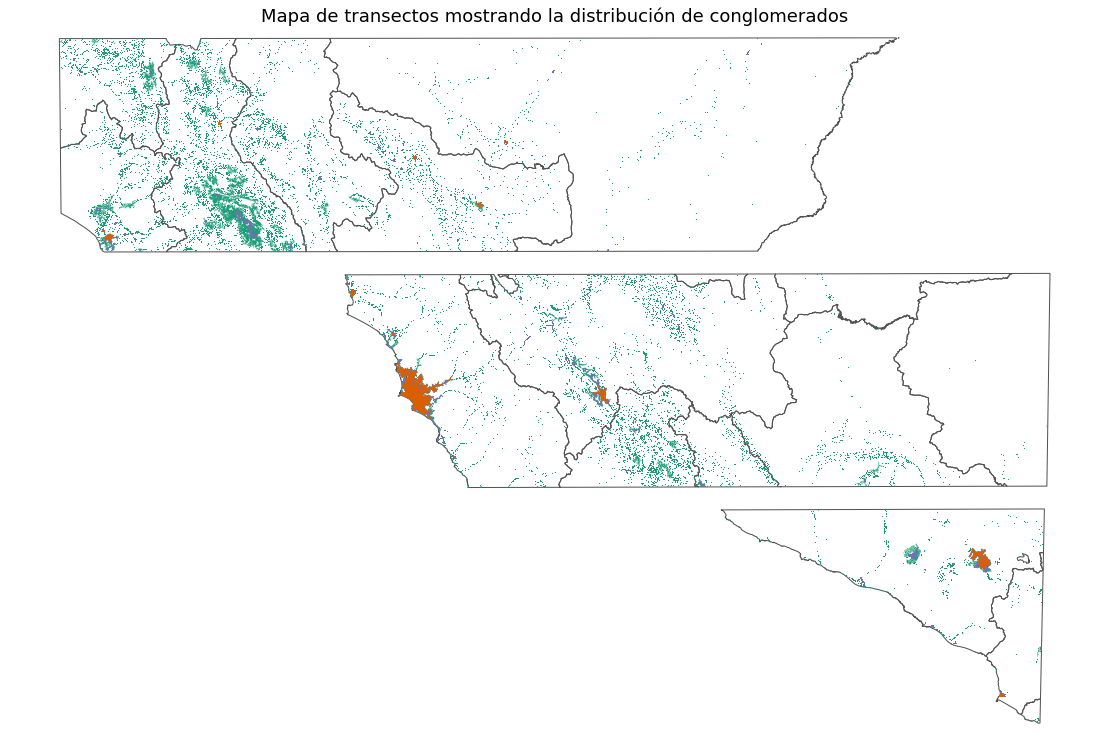

In [39]:
def box_32718(box_coords):
    bb=box(box_coords[0],box_coords[1],box_coords[2],box_coords[3])
    
    box_0=gpd.GeoDataFrame()
    box_0['geometry']=None
    box_0.at[0,'geometry']=bb
    
    box_0.crs = CRS.from_epsg(4326)
    box_0=box_0.to_crs("EPSG:32718")
    return box_0

coord=[[-80.30, -6.90, -70.95,  -4.90],
       [-80.30,-12.90, -70.95, -10.90],
       [-80.30,-17.90, -70.95, -15.90]]

box1=box_32718(coord[0])
box2=box_32718(coord[1])
box3=box_32718(coord[2])

fig, axs=plt.subplots(3,1,sharex=True, figsize=(20, 13))
fig.subplots_adjust(hspace=0)

for p,q in zip([0,1,2],[box1,box2,box3]):
    lim_dep17.clip(q).plot(ax=axs[p],facecolor='none',edgecolor='#525252')
    low_ha.clip(q).plot(ax=axs[p], facecolor='#1b9e77')
    medium.clip(q).plot(ax=axs[p], facecolor='#7570b3')    
    high.clip(q).plot(ax=axs[p],facecolor='#d95f02')
    axs[p].set_axis_off()
plt.axis('scaled')
    
axs[0].set_title("Mapa de transectos mostrando la distribución de conglomerados",
                 fontsize=18)
plt.savefig(path_d+"\\03. Images\\transectos_pais_2.jpg",dpi=300,bbox_inches='tight')